In [1]:
# Libraries
import numpy as np
import pandas as pd
from datetime import datetime as dt
from scipy import stats
import statsmodels.formula.api as sm_formula
import statsmodels.api as sm
import scipy
import math
import matplotlib.pyplot as plt
%matplotlib inline

### Example: relation between beers and alcohol concentration in blood

In [2]:
# Prepare data
df_cervalc = pd.DataFrame({'cerveses':[5,2,9,8,3,7,3,5,3,5,4,6,5,7,1,4],
                          'alcohol':[0.1,0.03,0.19,0.12,0.04,0.095,0.070,
                                     0.06,0.02,0.05,0.07,0.1,0.085,0.09,
                                     0.01,0.05]})

In [3]:
df_cervalc

,cerveses,alcohol
0,5,0.100
1,2,0.030
2,9,0.190
3,8,0.120
4,3,0.040
5,7,0.095
6,3,0.070
7,5,0.060
8,3,0.020
9,5,0.050


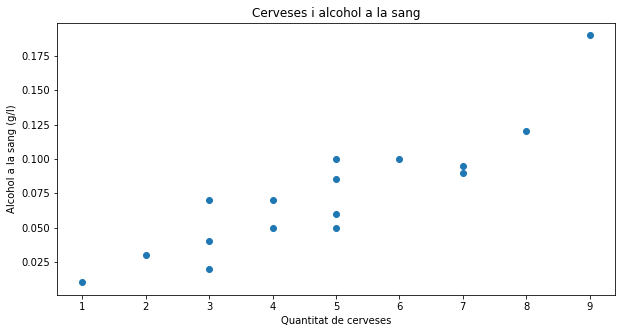

In [4]:
plt.figure(figsize=(10,5))
plt.scatter(df_cervalc['cerveses'],df_cervalc['alcohol'])
plt.title("Cerveses i alcohol a la sang")
plt.xlabel("Quantitat de cerveses")
plt.ylabel("Alcohol a la sang (g/l)")
plt.show()

In [4]:
mod = sm_formula.ols('alcohol ~ 1 + cerveses', data=df_cervalc)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     55.94
Date:                Wed, 19 Jan 2022   Prob (F-statistic):           2.97e-06
Time:                        23:08:15   Log-Likelihood:                 40.609
No. Observations:                  16   AIC:                            -77.22
Df Residuals:                      14   BIC:                            -75.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0127      0.013     -1.005      0.3

/home/miquel/anaconda3/envs/bpenv37/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [5]:
var = sum(res.resid*res.resid)/(len(res.resid)-2)
sd = math.sqrt(var)
print("Variance: {}".format(var))
print("Std. dev: {}".format(sd))    

Variance: 0.00041783249106372514
Std. dev: 0.02044095132482158


### Example: relation between brightness of an screen and battery duration

In [5]:
# Prepare data
df_screen = pd.DataFrame({'brillantor':[1,2,3,4,5,6,7,8,9,10],
                          'duracio':[241,193,205,169,174,
                                    134,163,124,111,92]})

In [6]:
mod = sm_formula.ols('duracio ~ 1 + brillantor', data=df_screen)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                duracio   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     75.39
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           2.41e-05
Time:                        15:28:40   Log-Likelihood:                -40.205
No. Observations:                  10   AIC:                             84.41
Df Residuals:                       8   BIC:                             85.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    239.8667     10.299     23.290      0.0

/home/miquel/anaconda3/envs/bpenv37/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


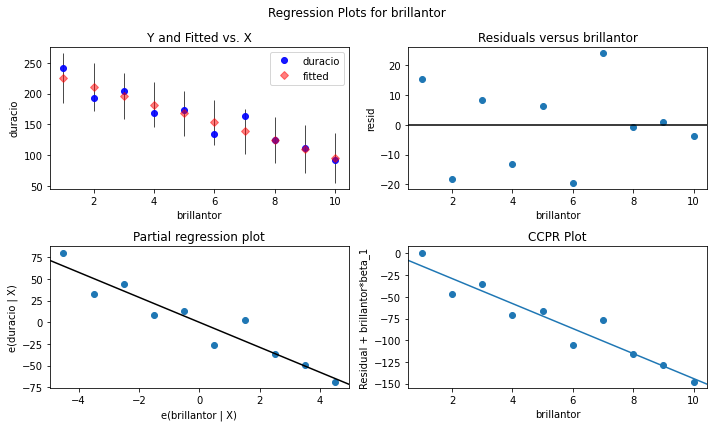

In [7]:
plt.rc("figure", figsize=(10,6))
fig = sm.graphics.plot_regress_exog(res, "brillantor")
fig.tight_layout(pad=1.0)

### Show confidence intervals for the forecast: for the mean or for individual observations

In [8]:
df_screen_fct = pd.DataFrame({'brillantor':[11,12,13]})

In [9]:
res.get_prediction(df_screen_fct).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,81.333333,10.299157,57.583436,105.083231,39.229265,123.437402
1,66.921212,11.795517,39.720701,94.121723,22.778684,111.063740
2,52.509091,13.330645,21.768569,83.249613,6.101391,98.916791


### Forecasting example

In [11]:
# Prepare data
df_modem = pd.DataFrame({'Tam1Mb':[1.59129, 1.59129, 0.51858, 1.29297,
                                   0.14062, 0.22461, 0.66895, 2.68000],
                         'Tpo1Mb':[23.22, 14.56, 6.07, 13.50, 
                                   1.38, 2.24, 5.95, 23.45]})

In [12]:
mod = sm_formula.ols('Tpo1Mb ~ 1 + Tam1Mb', data=df_modem)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tpo1Mb   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     43.49
Date:                Sun, 02 Jan 2022   Prob (F-statistic):           0.000584
Time:                        23:57:29   Log-Likelihood:                -19.772
No. Observations:                   8   AIC:                             43.54
Df Residuals:                       6   BIC:                             43.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9076      1.962      0.463      0.6

/home/miquel/anaconda3/envs/bpenv37/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [13]:
df_modem['log_Tam1Mb'] = df_modem['Tam1Mb'].apply(lambda x: math.log(x))
df_modem['log_Tpo1Mb'] = df_modem['Tpo1Mb'].apply(lambda x: math.log(x))

In [14]:
mod = sm_formula.ols('log_Tpo1Mb ~ 1 + log_Tam1Mb', data=df_modem)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             log_Tpo1Mb   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     224.2
Date:                Sun, 02 Jan 2022   Prob (F-statistic):           5.59e-06
Time:                        23:57:29   Log-Likelihood:                 3.3478
No. Observations:                   8   AIC:                            -2.696
Df Residuals:                       6   BIC:                            -2.537
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3322      0.068     34.333      0.0

/home/miquel/anaconda3/envs/bpenv37/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [15]:
res.get_prediction(df_modem).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2.800610,0.082620,2.598447,3.002774,2.307383,3.293837
1,2.800610,0.082620,2.598447,3.002774,2.307383,3.293837
2,1.670073,0.069470,1.500085,1.840061,1.189138,2.151009
3,2.591279,0.074804,2.408240,2.774319,2.105577,3.076981
4,0.354179,0.129830,0.036497,0.671862,-0.196570,0.904929
5,0.826381,0.103741,0.572536,1.080227,0.309815,1.342947
6,1.926807,0.065420,1.766730,2.086885,1.449285,2.404330
7,3.326220,0.107880,3.062247,3.590193,2.804603,3.847837


### Model validation

In [13]:
# Alcohol vs number of beers
mod = sm_formula.ols('alcohol ~ 1 + cerveses', data=df_cervalc)
res = mod.fit()
print(res.summary())
resid = res.resid
influence = res.get_influence()

#leverage (hat values)
leverage = influence.hat_matrix_diag
#Cook's D values (and p-values) as tuple of arrays
cooks_d = influence.cooks_distance
#standardized residuals
standardized_residuals = influence.resid_studentized_internal
#studentized residuals
studentized_residuals = influence.resid_studentized_external

                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     55.94
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           2.97e-06
Time:                        15:36:04   Log-Likelihood:                 40.609
No. Observations:                  16   AIC:                            -77.22
Df Residuals:                      14   BIC:                            -75.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0127      0.013     -1.005      0.3

/home/miquel/anaconda3/envs/bpenv37/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


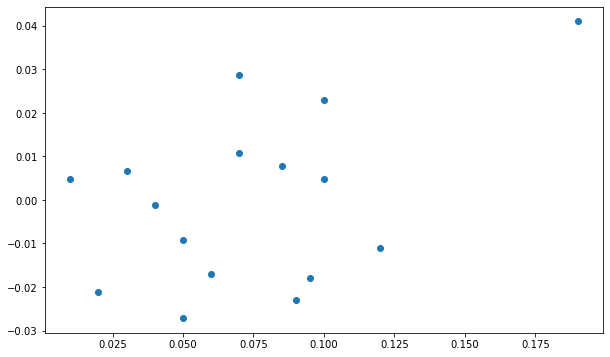

In [17]:
plt.scatter(df_cervalc['alcohol'],resid)

/home/miquel/anaconda3/envs/bpenv37/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


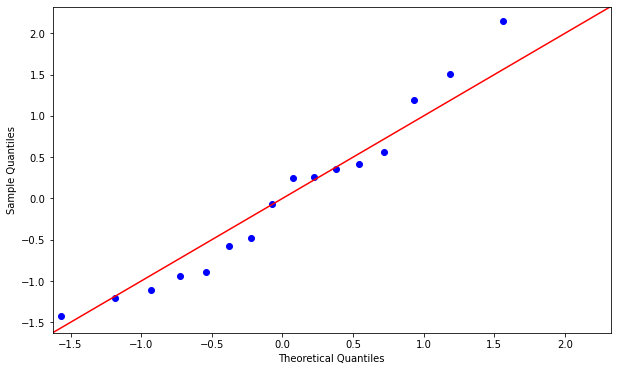

In [18]:
fig = sm.qqplot(resid, stats.t, fit=True, line="45")

<AxesSubplot:>

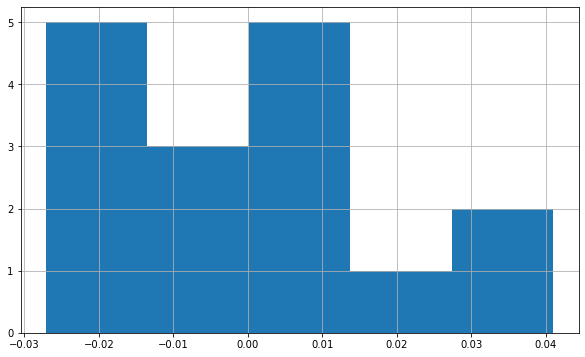

In [16]:
resid.hist(bins=5)

<AxesSubplot:>

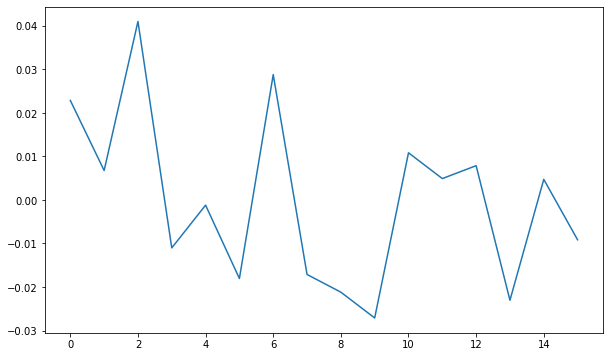

In [20]:
resid.plot()

In [21]:
# battery duration vs brightness
mod = sm_formula.ols('duracio ~ 1 + brillantor', data=df_screen)
res = mod.fit()
print(res.summary())
resid = res.resid
influence = res.get_influence()

#leverage (hat values)
leverage = influence.hat_matrix_diag
#Cook's D values (and p-values) as tuple of arrays
cooks_d = influence.cooks_distance
#standardized residuals
standardized_residuals = influence.resid_studentized_internal
#studentized residuals
studentized_residuals = influence.resid_studentized_external

                            OLS Regression Results                            
Dep. Variable:                duracio   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     75.39
Date:                Sun, 02 Jan 2022   Prob (F-statistic):           2.41e-05
Time:                        23:57:30   Log-Likelihood:                -40.205
No. Observations:                  10   AIC:                             84.41
Df Residuals:                       8   BIC:                             85.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    239.8667     10.299     23.290      0.0

/home/miquel/anaconda3/envs/bpenv37/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


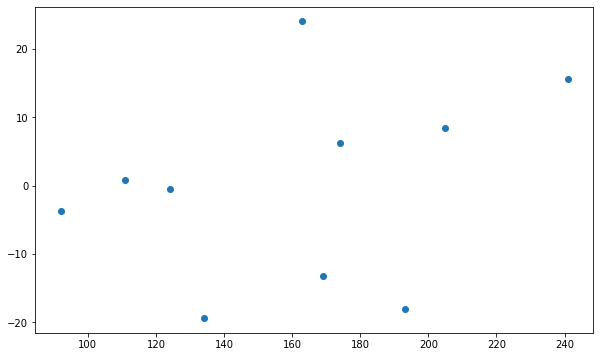

In [22]:
plt.scatter(df_screen['duracio'],resid)

/home/miquel/anaconda3/envs/bpenv37/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


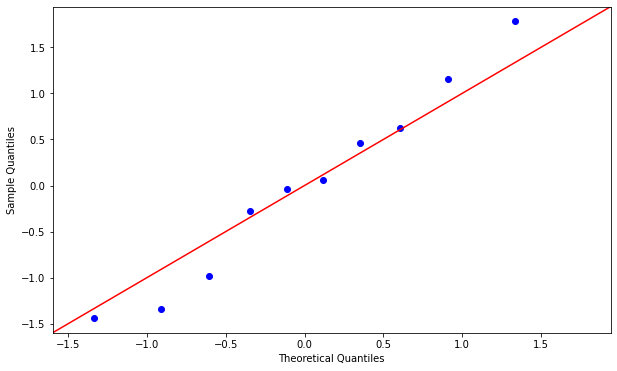

In [23]:
resid = res.resid
fig = sm.qqplot(resid, stats.t, fit=True, line="45")

<AxesSubplot:>

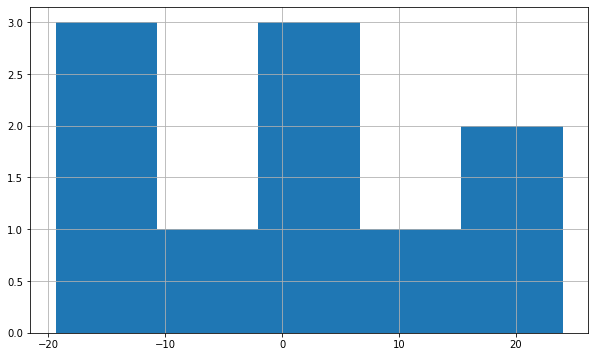

In [24]:
resid.hist(bins=5)

<AxesSubplot:>

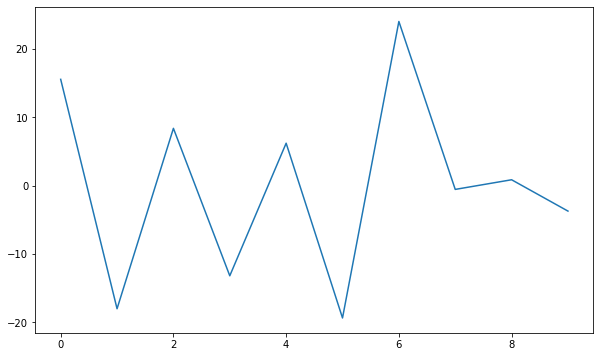

In [25]:
resid.plot()

### Analysis of Variance - ANOVA

In [26]:
table = sm.stats.anova_lm(res, typ=2) # Type 2 ANOVA DataFrame
table

,sum_sq,df,F,PR(>F)
brillantor,17136.012121,1.0,75.389909,0.000024
Residual,1818.387879,8.0,NaN,NaN


In [27]:
df_nodes = pd.DataFrame({
    'nodes':[250,250,250,250,250,250,
            500,500,500,500,500,500,
            1000,1000,1000,1000,1000,1000],
    'lgt':[2.31,4.48,2.59,3.06,2.10,3.95,
            3.94,6.38,6.52,5.27,3.72,3.61,
           6.45,7.32,6.76,6.08,8.35,6.01]})

In [28]:
res = sm_formula.ols('lgt ~ 1 + C(nodes)', data=df_nodes).fit()
table = sm.stats.anova_lm(res, typ=2) # Type 2 ANOVA DataFrame
table

,sum_sq,df,F,PR(>F)
C(nodes),42.121878,2.0,18.18221,0.000098
Residual,17.374900,15.0,NaN,NaN


In [29]:
### Fisher distribution test

In [30]:
1-scipy.stats.f.cdf(1.052, 2, 82)

0.35390381161213624

In [31]:
1-scipy.stats.f.cdf(18.15, 2, 15)

9.881075201600975e-05

### Speed vs fuel

In [32]:
df_speed = pd.DataFrame({
    'speed':[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150],
    'fuel':[21,13,10,8,7,5.9,6.3,6.95,7.57,8.27,9.03,9.87,10.79,11.77,12.83]      
})

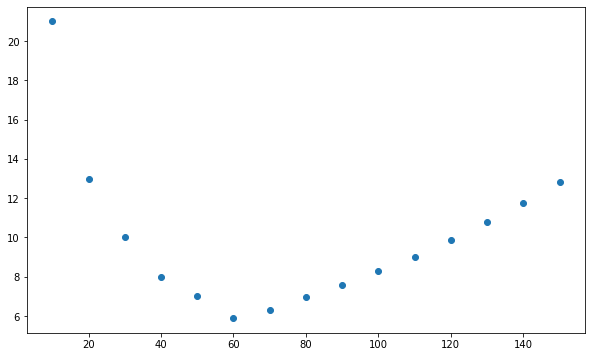

In [33]:
plt.scatter(df_speed['speed'],df_speed['fuel'])

In [34]:
# Linear model

In [35]:
mod = sm_formula.ols('fuel ~ 1 + speed', data=df_speed)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   fuel   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                 -0.045
Method:                 Least Squares   F-statistic:                    0.3945
Date:                Sun, 02 Jan 2022   Prob (F-statistic):              0.541
Time:                        23:57:30   Log-Likelihood:                -40.644
No. Observations:                  15   AIC:                             85.29
Df Residuals:                      13   BIC:                             86.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.0579      2.122      5.212      0.0

/home/miquel/anaconda3/envs/bpenv37/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [36]:
# Model is bad!

/home/miquel/anaconda3/envs/bpenv37/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


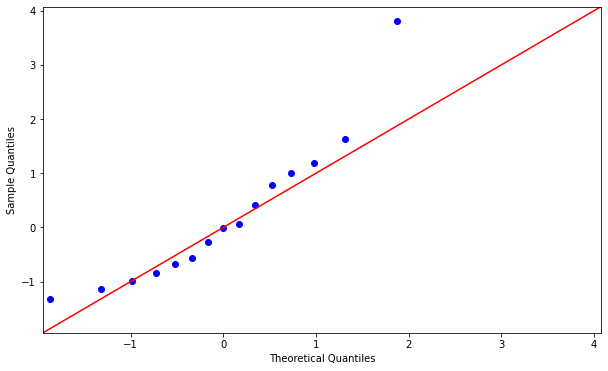

In [37]:
resid = res.resid
fig = sm.qqplot(resid, stats.t, fit=True, line="45")

In [38]:
# Try with a subsample

In [39]:
df_speed_subsample = df_speed[df_speed['speed']>60]

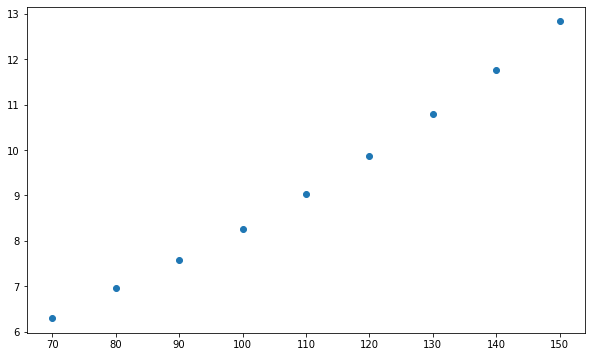

In [40]:
plt.scatter(df_speed_subsample['speed'],df_speed_subsample['fuel'])

Text(0, 0.5, 'consum de gasolina (litres/100km)')

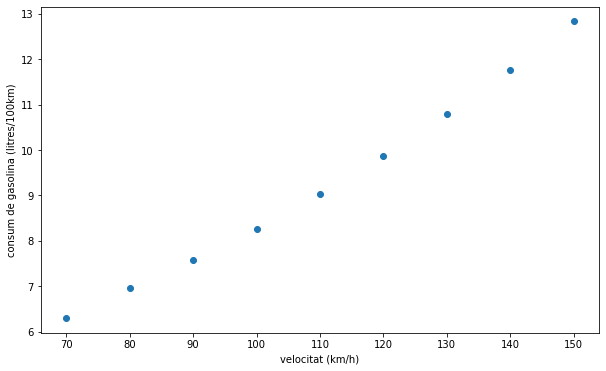

In [51]:
fig, ax = plt.subplots()
ax.scatter(df_speed_subsample['speed'],df_speed_subsample['fuel'])
ax.set_xlabel('velocitat (km/h)')
ax.set_ylabel('consum de gasolina (litres/100km)')

In [41]:
mod = sm_formula.ols('fuel ~ 1 + speed', data=df_speed_subsample)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   fuel   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     796.6
Date:                Sun, 02 Jan 2022   Prob (F-statistic):           1.80e-08
Time:                        23:57:30   Log-Likelihood:                 1.8902
No. Observations:                   9   AIC:                            0.2196
Df Residuals:                       7   BIC:                            0.6141
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3508      0.324      1.081      0.3

/home/miquel/anaconda3/envs/bpenv37/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


/home/miquel/anaconda3/envs/bpenv37/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


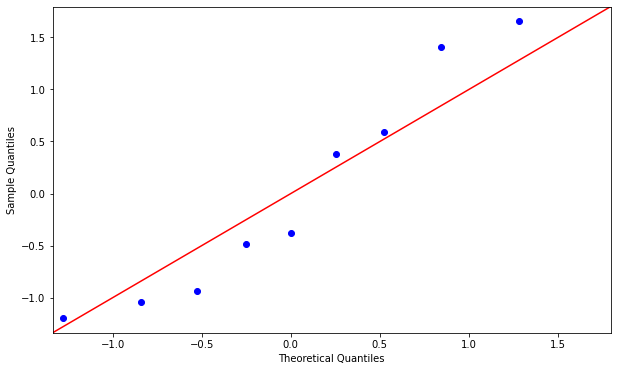

In [42]:
resid = res.resid
fig = sm.qqplot(resid, stats.t, fit=True, line="45")

### Example. Logarithmic transformations

In [18]:
# Prepare data
df_modem = pd.DataFrame({'Tam1Mb':[1.59129, 1.59129, 0.51858, 1.29297, 0.14062, 0.22461, 0.66895, 2.68000],
                         'Tpo1Mb':[23.22, 14.56, 6.07, 13.50, 1.38, 2.24, 5.95, 23.45]})

Text(0, 0.5, 'Tpo1Mb')

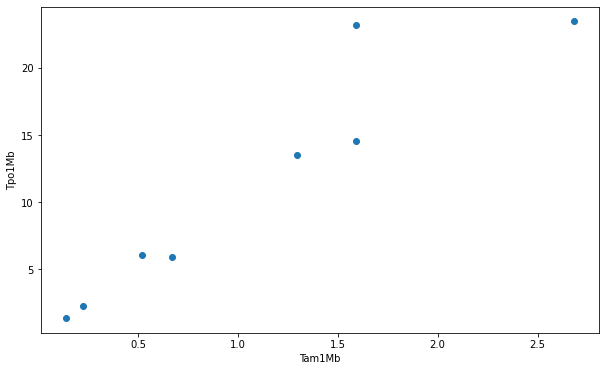

In [19]:
# Visual inspection of data
fig, ax = plt.subplots()
ax.scatter(df_modem['Tam1Mb'],df_modem['Tpo1Mb'])
ax.set_xlabel('Tam1Mb')
ax.set_ylabel('Tpo1Mb')

In [20]:
mod = sm_formula.ols('Tpo1Mb ~ 1 + Tam1Mb', data=df_modem)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tpo1Mb   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     43.49
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           0.000584
Time:                        15:44:38   Log-Likelihood:                -19.772
No. Observations:                   8   AIC:                             43.54
Df Residuals:                       6   BIC:                             43.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9076      1.962      0.463      0.6

/home/miquel/anaconda3/envs/bpenv37/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [21]:
# Logarithmic transformations
df_modem['log_Tam1Mb'] = df_modem['Tam1Mb'].apply(lambda x: math.log(x))
df_modem['log_Tpo1Mb'] = df_modem['Tpo1Mb'].apply(lambda x: math.log(x))

Text(0, 0.5, 'log_Tpo1Mb')

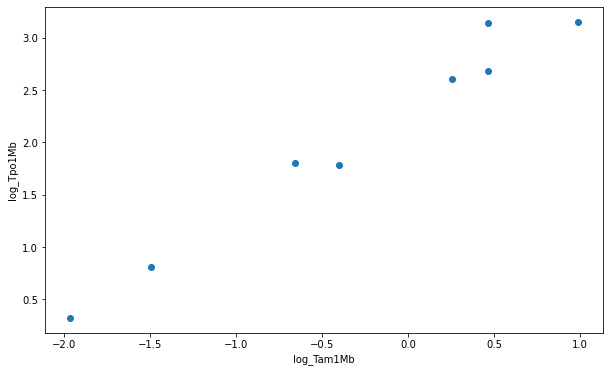

In [22]:
# Visual inspection of data
fig, ax = plt.subplots()
ax.scatter(df_modem['log_Tam1Mb'],df_modem['log_Tpo1Mb'])
ax.set_xlabel('log_Tam1Mb')
ax.set_ylabel('log_Tpo1Mb')

In [23]:
mod = sm_formula.ols('log_Tpo1Mb ~ 1 + log_Tam1Mb', data=df_modem)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             log_Tpo1Mb   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     224.2
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           5.59e-06
Time:                        15:44:40   Log-Likelihood:                 3.3478
No. Observations:                   8   AIC:                            -2.696
Df Residuals:                       6   BIC:                            -2.537
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3322      0.068     34.333      0.0

/home/miquel/anaconda3/envs/bpenv37/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [24]:
res.get_prediction(df_modem).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2.800610,0.082620,2.598447,3.002774,2.307383,3.293837
1,2.800610,0.082620,2.598447,3.002774,2.307383,3.293837
2,1.670073,0.069470,1.500085,1.840061,1.189138,2.151009
3,2.591279,0.074804,2.408240,2.774319,2.105577,3.076981
4,0.354179,0.129830,0.036497,0.671862,-0.196570,0.904929
5,0.826381,0.103741,0.572536,1.080227,0.309815,1.342947
6,1.926807,0.065420,1.766730,2.086885,1.449285,2.404330
7,3.326220,0.107880,3.062247,3.590193,2.804603,3.847837


## Exercises

- What is the R-squared metric?
- And the adjusted R-squared?

- What is the intercept?
- What is the variable located under the intercept?

- What is the meaning of the following columns:
    - coef    
    - std err
    - t
    - P>|t|
    - [0.025      0.975]
    
- Why do we use logarithmic transformations of variables?